# Twitter Sentiment Analysis - General Covid-19 dataset

We've used the following packages:

In [ ]:
import plotly.express as px
#from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import json
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from nltk.corpus import stopwords
import itertools
import altair as alt
from dateutil.parser import parse
from IPython.core.display import Image, display
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

alt.data_transformers.disable_max_rows()

Then we have defined the following functions to clean the tweets' text:

In [ ]:
def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

In order to do the classification of the tweets, we need to read the csv file and the json file:

In [ ]:
data = []
with open('dataset/general_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))
data1 = data
data2 = data
data5 = data
data6 = data
data7 = data
data9 = data

## Pie chart

We're interested in the "full_text" field, that it has been cleaned with specific functions.  
We've used **SentimentIntensityAnalyzer** to calculate positive, negative and neutral sentiment scores from the text.

In [ ]:
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
positive_scores = []
neutral_scores = []
negative_scores = []
id_positive = []
id_neutral = []
id_negative = []

index=0
stop_words = stopwords.words('english')

for element in data:
    data[index]['full_text'] = remove_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_twitter_urls(data[index]['full_text'])
    data[index]['full_text'] = noamp(data[index]['full_text'])                  # No amp with space
    data[index]['full_text'] = re.sub("^RT ", " ", data[index]['full_text'])    # No RT
    
    tweet_list.append(data[index]['full_text'])
    #analysis = TextBlob(data[index]['full_text'])
    score = SentimentIntensityAnalyzer().polarity_scores(data[index]['full_text'])
    #print(data[index]['full_text'])
    #print(score['compound'])
    #print(" ")
    if score['compound']>0.05:
        positive_list.append(data[index]['full_text'])
        positive_scores.append(score['compound'])
        id_positive.append(data[index]['id_str'])
    elif score['compound']<-0.05:
        negative_list.append(data[index]['full_text'])
        negative_scores.append(score['compound'])
        id_negative.append(data[index]['id_str'])
    else:
        neutral_list.append(data[index]['full_text'])
        neutral_scores.append(score['compound'])
        id_neutral.append(data[index]['id_str'])
 
    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.



We've reported the number of tweets (Positive, Negative, Neutral) in a DataFrame in order to visualise them:

In [ ]:
print("Total number of tweets: ",len(tweet_list))
print("Positive number: ",len(positive_list))
print("Negative number: ", len(negative_list))
print("Neutral number: ",len(neutral_list))

category = []
count = []

categorypositive = ["Positive"] * len(positive_list)
categoryneutral = ["Neutral"] * len(neutral_list)
categorynegative = ["Negative"] * len(negative_list)

category = categorypositive + categoryneutral + categorynegative

count = Counter(category)

df_fake1 = pd.DataFrame.from_dict(count, orient='index').reset_index()
df_fake1 = df_fake1.rename(columns={'index':'Category', 0:'Count'})

Then we have created the pie chart:

In [ ]:
colors = ['#1AFF1A', '#005AB5', '#DC3220']
    
fig_fake1 = px.pie(df_fake1, values='Count', names='Category',
             title='Tweets percentage classified by sentiment - General Covid-19 dataset')
fig_fake1.update_traces(sort=False,textposition='inside', textinfo='percent+label',textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0.8)))
fig_fake1.show()

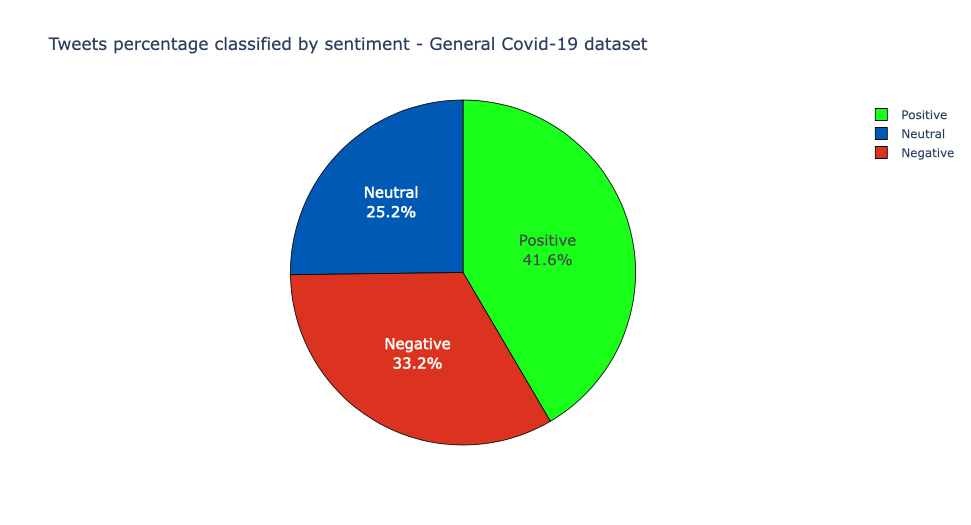

## A few examples...

### An example of a tweet with a positive sentiment score

In [ ]:
positive_scores.sort()
print(positive_scores[len(positive_scores)-4])
ind = positive_scores.index(positive_scores[len(positive_scores)-4])
print("https://twitter.com/anyuser/status/" + id_positive[ind])

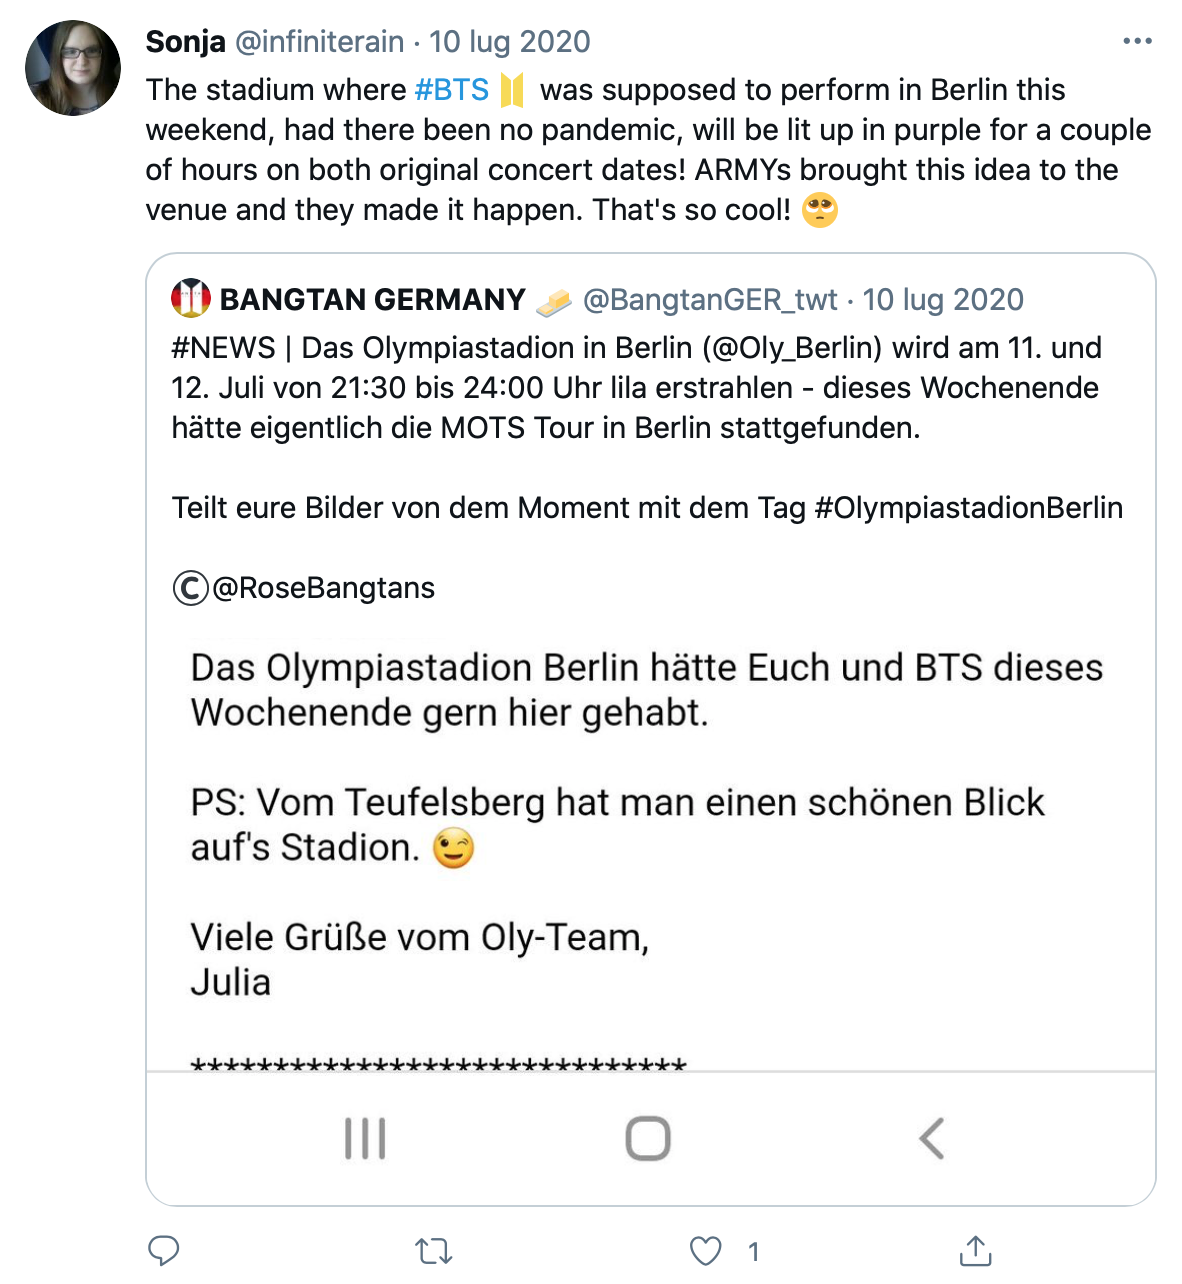

### An example of a tweet with a negative sentiment score

In [ ]:
negative_scores.sort()
print(negative_scores[7000])
ind = negative_scores.index(negative_scores[7000])
print("https://twitter.com/anyuser/status/" + id_negative[ind])

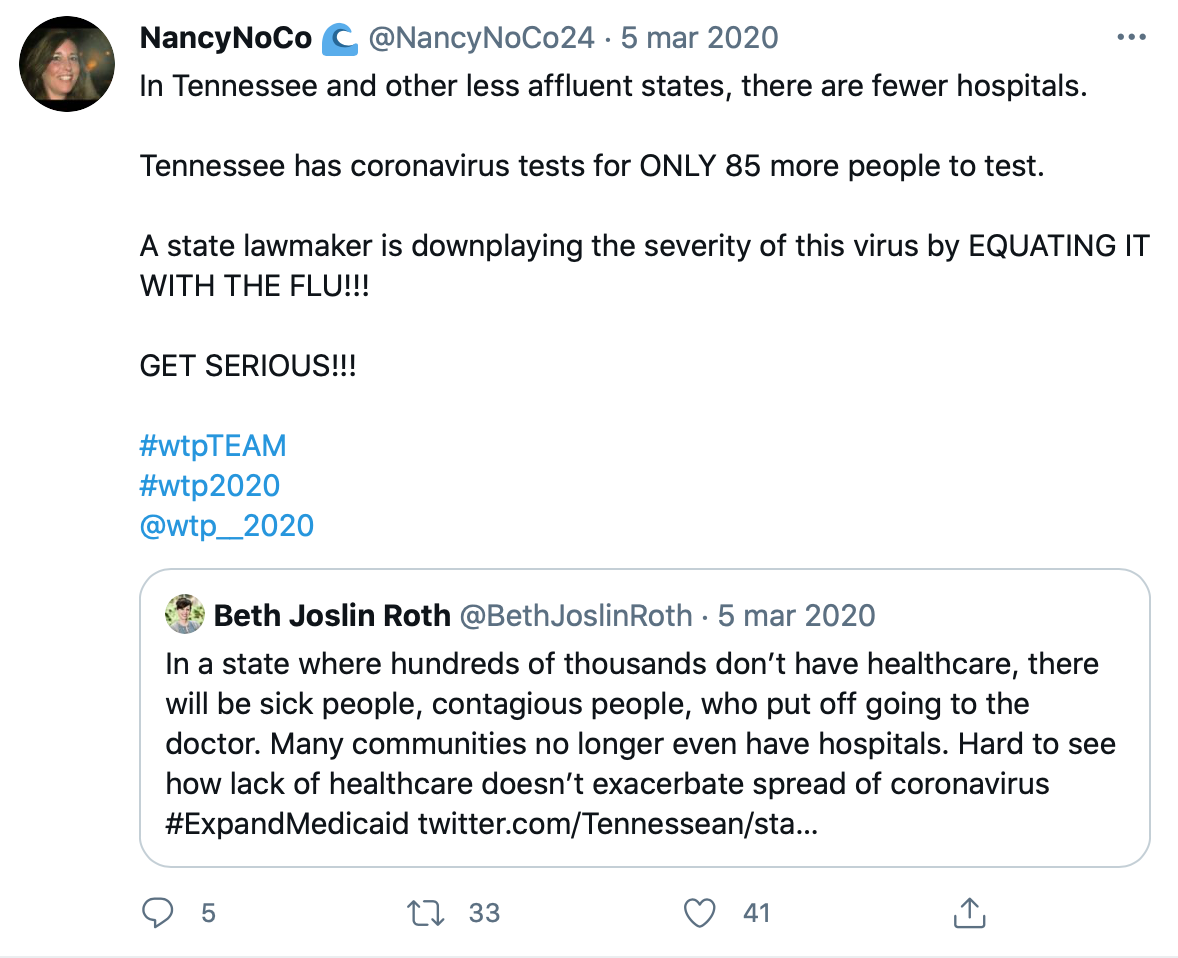

### An example of a tweet with a neutral sentiment score

In [ ]:
#neutral_scores.sort()
#print("It is considered a neutral tweet but it has slight polarity to the positive side, its score is 0.022")
ind = neutral_scores.index(0.022)
print("https://twitter.com/anyuser/status/" + id_neutral[ind])

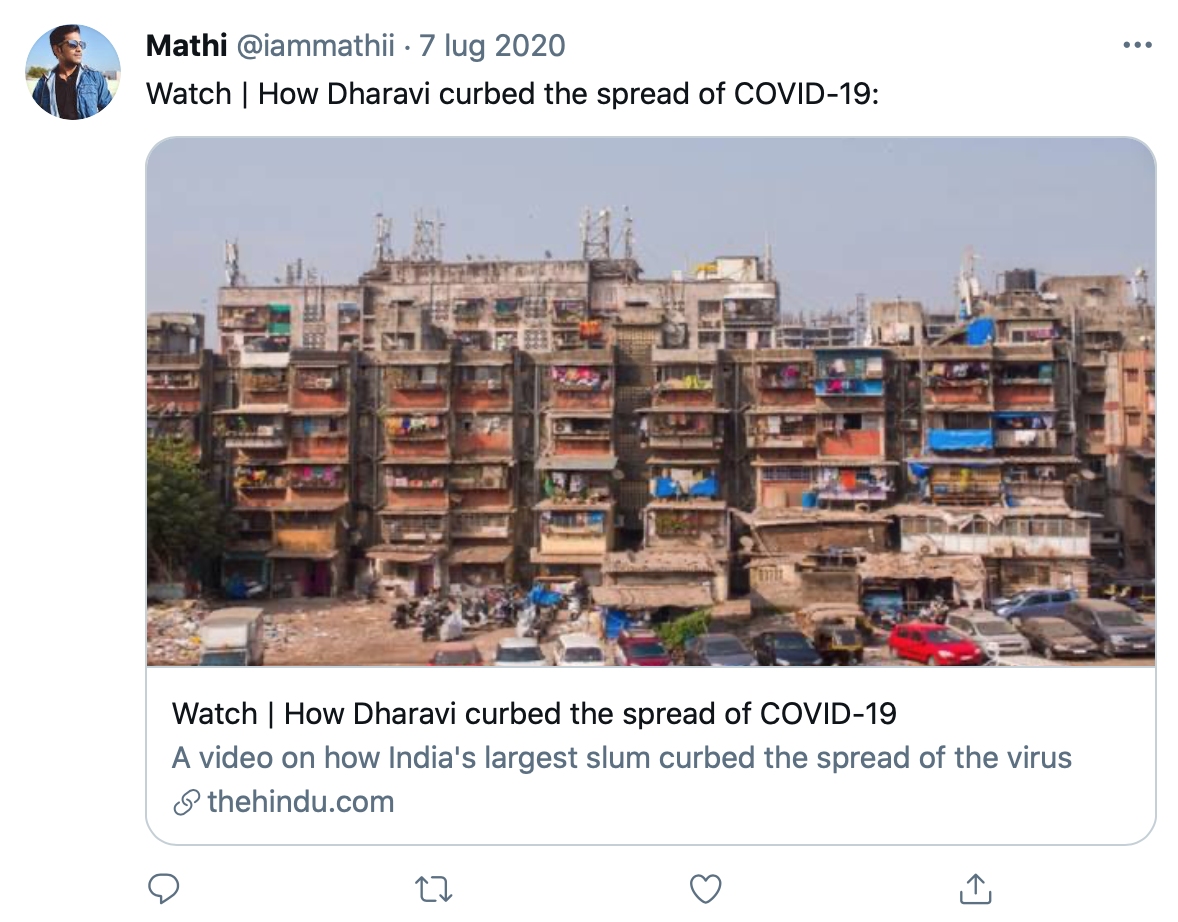

### Distribution of sentiment values classified by sentiment category and tweet type (False, Partially False)

In [ ]:
tweet_list = []
scores = []
sentiment = []

index=0

for element in data1:
    print(index)
    
    data1[index]['full_text'] = remove_urls(data1[index]['full_text'])
    data1[index]['full_text'] = remove_twitter_urls(data1[index]['full_text'])
    data1[index]['full_text'] = noamp(data1[index]['full_text'])                  # No amp with space
    data1[index]['full_text'] = re.sub("^RT ", " ", data1[index]['full_text'])    # No RT
    
    tweet_list.append(data1[index]['full_text'])
    score = SentimentIntensityAnalyzer().polarity_scores(data1[index]['full_text'])
    if score['compound']>0.05:
        scores.append(score['compound'])
        sentiment.append("positive")
    elif score['compound']<-0.05:
        scores.append(score['compound'])
        sentiment.append("negative")
    else:
        scores.append(score['compound'])
        sentiment.append("neutral")

    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.


df_general1 = pd.DataFrame(
    {'Scores':scores,
     'Sentiment': sentiment
    })

In [ ]:

stripplot =  alt.Chart(df_general1, width=800, height=120,title="Distribution of sentiment scores classified by sentiment type").mark_circle(size=30).encode(
    y=alt.Y(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    x=alt.X('Scores'),
    color=alt.Color('Sentiment', scale=alt.Scale(range=['#DC3220', '#005AB5', '#1AFF1A'])),
    row=alt.Row(
        'Sentiment',
        header=alt.Header(
            labelAngle=0,
            titleOrient='left',
            labelOrient='left',
            labelAlign='left',
            labelPadding=3,
            labelFontSize=14,
            titleFontSize=14
        ),
    ),
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_axis(
    labelFontSize=14,
    titleFontSize=15,
    titlePadding=15
).configure_title(
    fontSize=17,
    offset=25
).configure_legend(
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
)

stripplot

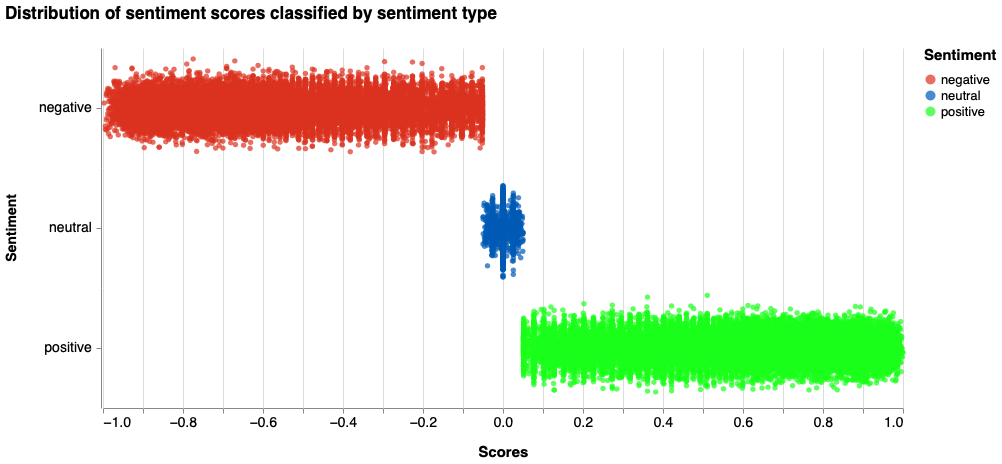

As we can see from the chart the score values are covering pretty much all the values for each category

### Frequency of positive, neutral, negative tweets

In [ ]:
positive = 0
neutral = 0
negative = 0

index=0

for element in data2:
    print(index)
    data2[index]['full_text'] = remove_urls(data2[index]['full_text'])
    data2[index]['full_text'] = remove_twitter_urls(data2[index]['full_text'])
    data2[index]['full_text'] = noamp(data2[index]['full_text'])                  # No amp with space
    data2[index]['full_text'] = re.sub("^RT ", " ", data2[index]['full_text'])    # No RT
    
    tweet_list.append(data2[index]['full_text'])
    score = SentimentIntensityAnalyzer().polarity_scores(data2[index]['full_text'])
    if score['compound']>0.05:
        positive = positive + 1
    elif score['compound']<-0.05:
        negative = negative + 1
    else:
        neutral = neutral + 1
 
    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.

count = [positive, negative, neutral]
sentiment = ["Positive", "Negative","Neutral"]
df_general2 = pd.DataFrame(
    {'Tweet Count': count,
     'Sentiment': sentiment
    })

#print(df_general2)

In [ ]:
range_ = ['#DC3220', '#005AB5', '#1AFF1A']
bars = alt.Chart(df_general2).mark_bar().encode(
    x=alt.X('Tweet Count:Q'),
    y=alt.Y('Sentiment:N'),#,axis=alt.Axis(labelFontWeight="bold")
    color=alt.Color('Sentiment:N', scale=alt.Scale(range=range_)),
    tooltip=[
        alt.Tooltip('Sentiment:N', title='Sentiment Type'),
        alt.Tooltip('Tweet Count:Q', title='Tweet Count')
    ]
).properties(
    title="Frequency of positive, neutral and negative tweets", 
    width=950,
    height=100
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15,
).configure_legend(
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
).configure_header(
    titleFontSize=15,
    labelFontSize=13
)

bars

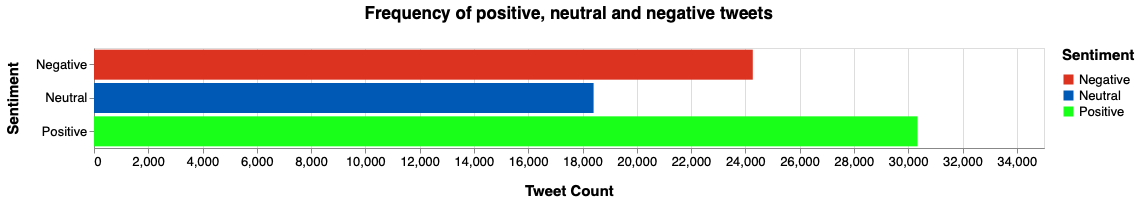

### Heatmap AVERAGE sentiment score per day (all tweets)

In [ ]:
index=0
values = {}
#dates = []

for el in data5:
    token=data5[index]['created_at']
    d = parse(token)
    datadic = d.strftime("%Y/%m/%d")
        #dates.append(datadic)
    values[datadic] = {
        "score" : 0,
        "count" : 0
    }
    index = index + 1

    
index = 0

for element in data5:
    print(index)
    data5[index]['full_text'] = remove_urls(data5[index]['full_text'])
    data5[index]['full_text'] = remove_twitter_urls(data5[index]['full_text'])
    data5[index]['full_text'] = noamp(data5[index]['full_text'])                  # No amp with space
    data5[index]['full_text'] = re.sub("^RT ", " ", data5[index]['full_text'])    # No RT
    
    score = SentimentIntensityAnalyzer().polarity_scores(data5[index]['full_text'])
    token=data5[index]['created_at']
    d = parse(token)
    d = d.strftime('%Y/%m/%d')
        
    values[d]['score'] = values[d]['score'] + score['compound']
    values[d]['count'] = values[d]['count'] + 1
 
    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.

        
for x in values.keys():
        #if values[date.strftime("%Y/%m/%d")]['score']!=0 and values[date.strftime("%Y/%m/%d")]['count']!=0:
    avg = values[x]['score']/values[x]['count']
    values[x].pop('score')
    values[x].pop('count')
    values[x]['media'] = round(avg, 4)
        #else:
        #    values[date.strftime("%Y/%m/%d")].pop('score')
        #    values[date.strftime("%Y/%m/%d")].pop('count')
        #    values[date.strftime("%Y/%m/%d")]['media'] = 0
        
            
dfc = pd.DataFrame.from_dict(values, orient='index').reset_index()
dfc = dfc.rename(columns={'index':'data'})
#print(dfa)

chartduec = alt.Chart(
    dfc,
    title="Heatmap AVERAGE sentiment score per day"
).mark_rect().encode(
    x=alt.X('date(data):O',title="Day"),
    y=alt.Y('month(data):O',title="Month"),
    color=alt.Color('media:Q', scale=alt.Scale(scheme="redyellowgreen"),title="Avg Sentiment Score"),
    tooltip=[
        alt.Tooltip('monthdate(data):T', title='Date'),
        alt.Tooltip('media:Q', title='Avg Sentiment Score')
    ]
).properties(width=1500, height=500)

# Configure text
textduec = chartduec.mark_text(baseline='middle').encode(
    text='media:Q',
    color=alt.condition(
        alt.FieldRangePredicate(field='media', range=[-0.03, 0.1]),
        alt.value('black'),
        alt.value('white')
    )
)

(chartduec + textduec).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=25,
    titleFontSize=14,
    labelFontSize=12,
    titlePadding=10
)

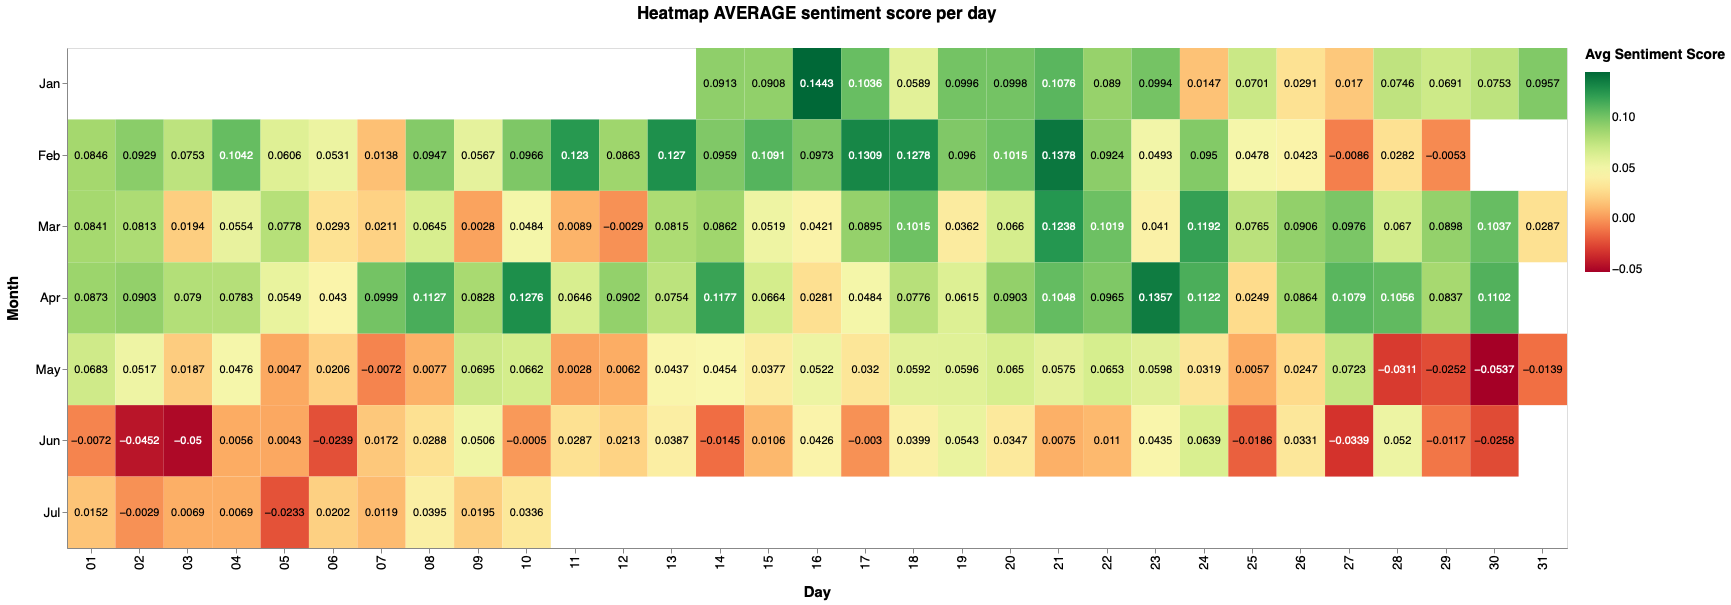

### Distribution of sentiment values classified by sentiment category (tweets with covid19 hashtags)

We've selected some covid19 hashtags and showed the distribution of their sentiment scores: **covid19, coronavirus, covid, covid-19, covid_19, corona, coronaoutbreak**

In [ ]:
tweet_list = []
scores = []
category = []
sentiment = []

index=0

for element in data6:
    print(index)
    for entity in data6[index]['entities']['hashtags']:
        if entity['text'].lower() == 'covid19' or entity['text'].lower() == 'coronavirus'  or entity['text'].lower() == 'covid' or entity['text'].lower() == 'covid-19' or entity['text'].lower() == 'covid_19' or entity['text'].lower() == 'corona' or entity['text'].lower() == 'coronaoutbreak':
            data6[index]['full_text'] = remove_urls(data6[index]['full_text'])
            data6[index]['full_text'] = remove_twitter_urls(data6[index]['full_text'])
            data6[index]['full_text'] = noamp(data6[index]['full_text'])                  # No amp with space
            data6[index]['full_text'] = re.sub("^RT ", " ", data6[index]['full_text'])    # No RT
            score = SentimentIntensityAnalyzer().polarity_scores(data6[index]['full_text'])
            if score['compound']>0.05:
                scores.append(score['compound'])
                category.append("false")
                sentiment.append("positive")
            elif score['compound']<-0.05:
                scores.append(score['compound'])
                category.append("false")
                sentiment.append("negative")
            else:
                scores.append(score['compound'])
                category.append("false")
                sentiment.append("neutral")
 
    #> 0.05 as positive, and <-0.05
    
    index=index+1           # Total number of tweets in the dataset.


df_covid = pd.DataFrame(
    {'Scores':scores,
     'Sentiment': sentiment
    })

In [ ]:

stripplotcovid =  alt.Chart(df_covid, width=800, height=120,title="Distribution of sentiment values classified by sentiment category (tweets with covid19 hashtags)").mark_circle(size=30).encode(
    y=alt.Y(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    x=alt.X('Scores'),
    color=alt.Color('Sentiment', scale=alt.Scale(range=['#DC3220', '#005AB5', '#1AFF1A'])),
    row=alt.Row(
        'Sentiment',
        header=alt.Header(
            labelAngle=0,
            titleOrient='left',
            labelOrient='left',
            labelAlign='left',
            labelPadding=3,
            labelFontSize=14,
            titleFontSize=14
        ),
    ),
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_axis(
    labelFontSize=14,
    titleFontSize=15,
    titlePadding=15
).configure_title(
    fontSize=17,
    offset=25
).configure_legend(
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
)

stripplotcovid

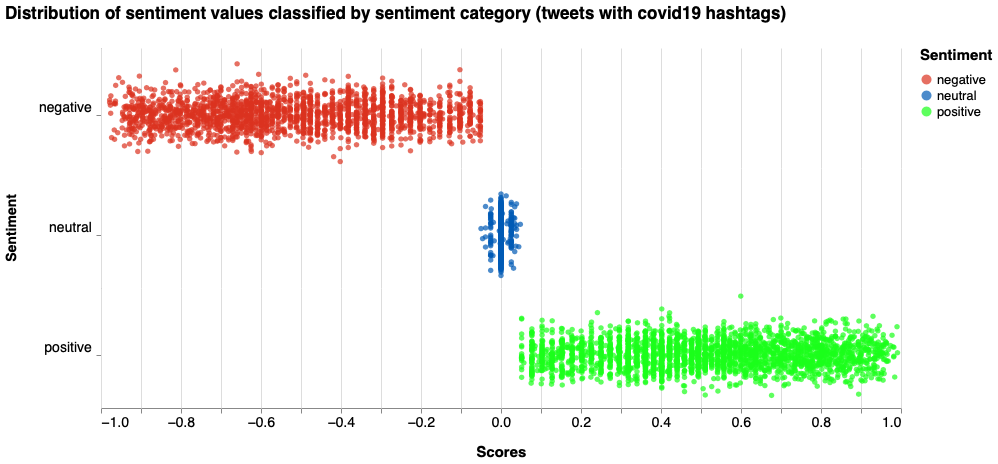

### Frequency of positive, neutral, negative tweets (tweets with covid19 hashtags)

In [ ]:
positive = 0
neutral = 0
negative = 0

index=0

for element in data7:
    print(index)
    for entity in data7[index]['entities']['hashtags']:
        if entity['text'].lower() == 'covid19' or entity['text'].lower() == 'coronavirus'  or entity['text'].lower() == 'covid' or entity['text'].lower() == 'covid-19' or entity['text'].lower() == 'covid_19' or entity['text'].lower() == 'corona' or entity['text'].lower() == 'coronaoutbreak':
            data7[index]['full_text'] = remove_urls(data7[index]['full_text'])
            data7[index]['full_text'] = remove_twitter_urls(data7[index]['full_text'])
            data7[index]['full_text'] = noamp(data7[index]['full_text'])                  # No amp with space
            data7[index]['full_text'] = re.sub("^RT ", " ", data7[index]['full_text'])    # No RT
    
            tweet_list.append(data7[index]['full_text'])
            score = SentimentIntensityAnalyzer().polarity_scores(data7[index]['full_text'])
            if score['compound']>0.05:
                positive = positive + 1
            elif score['compound']<-0.05:
                negative = negative + 1
            else:
                neutral = neutral + 1
    
    index=index+1           # Total number of tweets in the dataset.

#count = [positivefalse, positivepfalse, negativefalse, negativepfalse, neutralfalse, neutralpfalse]
#tipo = ["false", "partially false","false", "partially false","false", "partially false"]
#sentiment = ["Positive", "Positive", "Negative","Negative","Neutral","Neutral"]
count = [positive,negative,neutral]
tipo = ["Positive", "Negative","Neutral"]
df_hashcovid = pd.DataFrame(
    {'Scores':count,
    'Type': tipo
    })

print(df_hashcovid)

range_ = ['#DC3220', '#005AB5', '#1AFF1A']
bars = alt.Chart(df_hashcovid).mark_bar().encode(
    x=alt.X('Scores:Q',title="Tweet count"),
    y=alt.Y('Type:N'),
    color=alt.Color('Type:N', scale=alt.Scale(range=range_),title="Category"),
    tooltip=[
        alt.Tooltip('Sentiment:N', title='Sentiment Type'),
        alt.Tooltip('Tweet Count:Q', title='Tweet Count')
    ]
).properties(
    title="Frequency of positive, neutral, negative tweets (tweets with covid19 hashtags)", 
    width=950,
    height=100
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    titleFontSize=15,
    labelFontSize=13,
).configure_header(
    titleFontSize=15,
    labelFontSize=13
)
bars

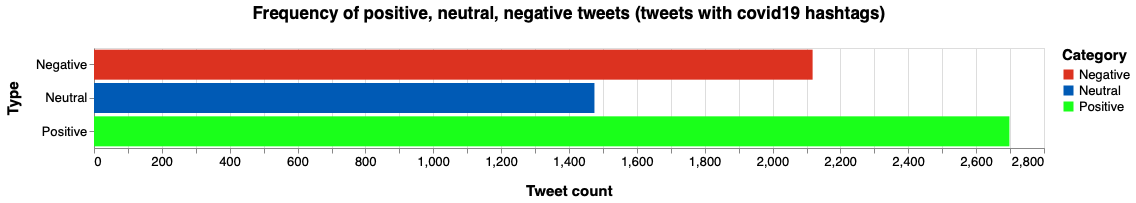

In [ ]:
colors = ['#1AFF1A', '#005AB5', '#DC3220']
    
pie_fig_hash = px.pie(df_hashcovid, values='Count', names='Category',
             title='Tweets with covid19 hashtags classified by sentiment - General Covid-19 dataset')
pie_fig_hash.update_traces(sort=False,textposition='inside', textinfo='percent+label',textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0.8)))
pie_fig_hash.show()

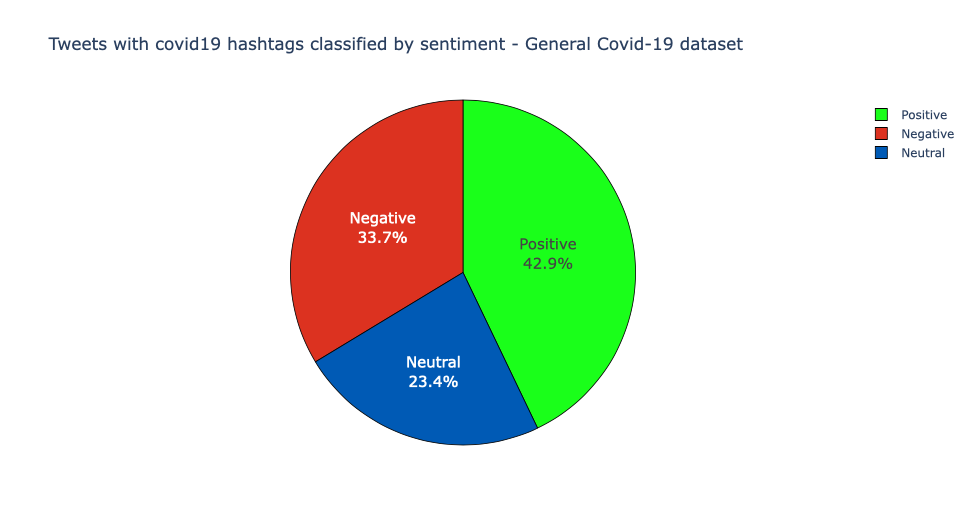

### Heatmap AVERAGE sentiment score per day (tweets with covid19 hashtags)

In [ ]:
index=0
values = {}
#dates = []

for el in data9:
    for entity in data6[index]['entities']['hashtags']:
        if entity['text'].lower() == 'covid19' or entity['text'].lower() == 'coronavirus'  or entity['text'].lower() == 'covid' or entity['text'].lower() == 'covid-19' or entity['text'].lower() == 'covid_19' or entity['text'].lower() == 'corona' or entity['text'].lower() == 'coronaoutbreak':
            token=data9[index]['created_at']
            d = parse(token)
            datadic = d.strftime("%Y/%m/%d")
            values[datadic] = {
                "score" : 0,
                "count" : 0
            }
    index = index + 1

    
index = 0

for element in data9:  
    for entity in data9[index]['entities']['hashtags']:
        if entity['text'].lower() == 'covid19' or entity['text'].lower() == 'coronavirus'  or entity['text'].lower() == 'covid' or entity['text'].lower() == 'covid-19' or entity['text'].lower() == 'covid_19' or entity['text'].lower() == 'corona' or entity['text'].lower() == 'coronaoutbreak':
            data9[index]['full_text'] = remove_urls(data9[index]['full_text'])
            data9[index]['full_text'] = remove_twitter_urls(data9[index]['full_text'])
            data9[index]['full_text'] = noamp(data9[index]['full_text'])                  # No amp with space
            data9[index]['full_text'] = re.sub("^RT ", " ", data9[index]['full_text'])    # No RT

            score = SentimentIntensityAnalyzer().polarity_scores(data9[index]['full_text'])
            token=data9[index]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m/%d')

            values[d]['score'] = values[d]['score'] + score['compound']
            values[d]['count'] = values[d]['count'] + 1
    
    index=index+1           # Total number of tweets in the dataset.

        
for x in values.keys():
        #if values[date.strftime("%Y/%m/%d")]['score']!=0 and values[date.strftime("%Y/%m/%d")]['count']!=0:
    avg = values[x]['score']/values[x]['count']
    values[x].pop('score')
    values[x].pop('count')
    values[x]['media'] = round(avg, 4)
        #else:
        #    values[date.strftime("%Y/%m/%d")].pop('score')
        #    values[date.strftime("%Y/%m/%d")].pop('count')
        #    values[date.strftime("%Y/%m/%d")]['media'] = 0
        
            
dfcovidall = pd.DataFrame.from_dict(values, orient='index').reset_index()
dfcovidall = dfcovidall.rename(columns={'index':'data'})
#print(dfa)

chartcovall = alt.Chart(
    dfcovidall,
    title="Heatmap AVERAGE sentiment score per day (tweets with covid19 hashtags)"
).mark_rect().encode(
    x=alt.X('date(data):O',title="Day"),
    y=alt.Y('month(data):O',title="Month"),
    color=alt.Color('media:Q', scale=alt.Scale(scheme="redyellowgreen"),title="Avg Sentiment Score"),
    tooltip=[
        alt.Tooltip('monthdate(data):T', title='Date'),
        alt.Tooltip('media:Q', title='Avg Sentiment Score')
    ]
).properties(width=1500, height=500)

# Configure text
textcovall = chartcovall.mark_text(baseline='middle').encode(
    text='media:Q',
    color=alt.condition(
        alt.FieldRangePredicate(field='media', range=[-0.2, 0.2]),
        alt.value('black'),
        alt.value('white')
    )
)

(chartcovall + textcovall).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=25,
    titleFontSize=14,
    labelFontSize=12,
    titlePadding=10
)

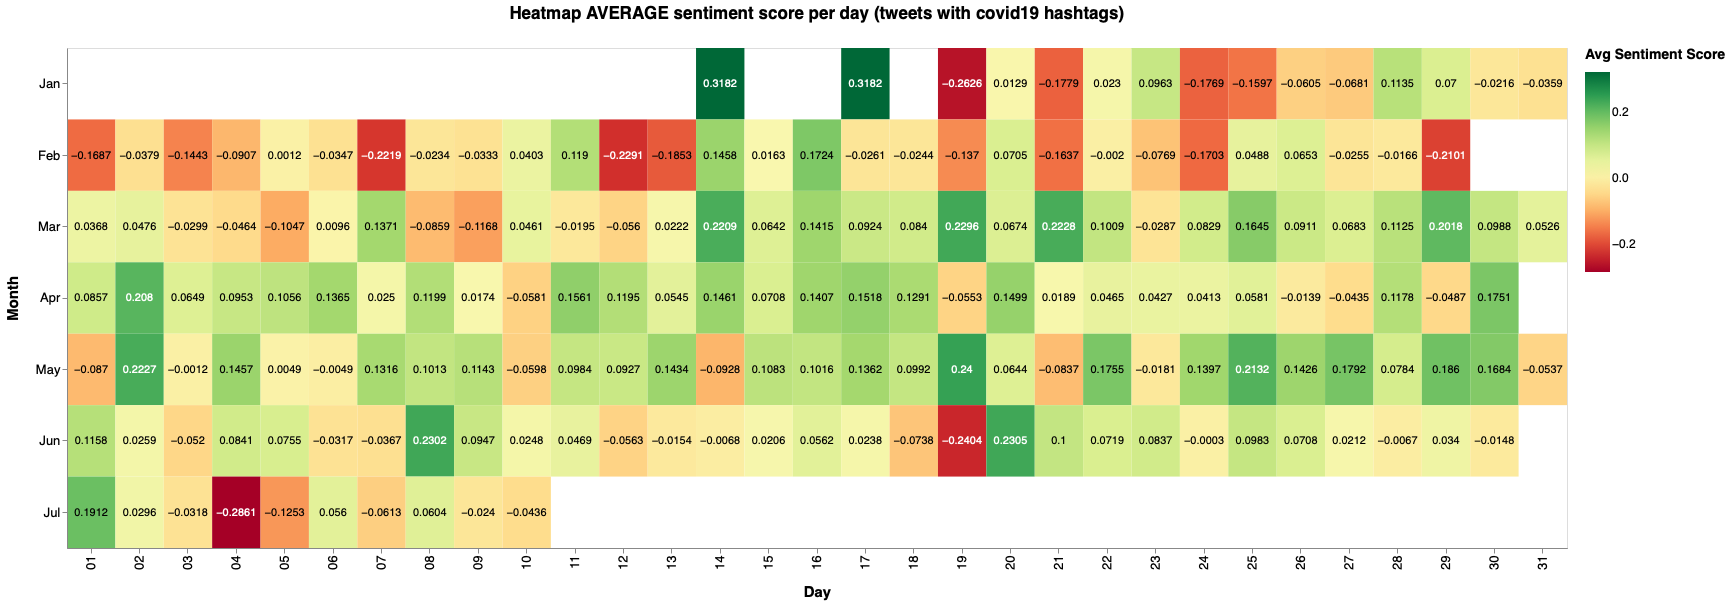